# Question 8

This question involves the use of simple linear regression on the Auto data set.

## Question 8a  

Use the `lm()` function to perform a simple linear regression with `mpg` as the response and `horsepower` as the predictor. Use the `summary()` function to print the results. Comment on the output.

-----

In [27]:
library(ISLR)
fix(Auto)
head(Auto)

mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500


In [3]:
lm_auto = lm(mpg~horsepower, data=Auto)

In [4]:
summary(lm_auto)


Call:
lm(formula = mpg ~ horsepower, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.5710  -3.2592  -0.3435   2.7630  16.9240 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 39.935861   0.717499   55.66   <2e-16 ***
horsepower  -0.157845   0.006446  -24.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.906 on 390 degrees of freedom
Multiple R-squared:  0.6059,	Adjusted R-squared:  0.6049 
F-statistic: 599.7 on 1 and 390 DF,  p-value: < 2.2e-16


i) There is a relationship between the predictor (horsepower) and the response (mpg). The F statistic is well above 1 and the p-value is close to zero so we can reject the null hypothesis that there is no relationship between these two.

ii) It is a significant relationship (p-value <2e-16). The RSE is 4.906. The R<sup>2</sup> is 0.6059, suggesting that ~60.6% of the variability in mpg can be explained by horsepower.

iii) It is a negative relationship (increase in horsepower -> decrease in mpg) as demonstrated by the $\beta{1}$ value of -0.1578

In [9]:
predict(lm_auto, data.frame(horsepower=c(98)), interval = "confidence")

,fit,lwr,upr
1,24.46708,23.97308,24.96108


In [10]:
predict(lm_auto, data.frame(horsepower=c(98)), interval = "prediction")

,fit,lwr,upr
1,24.46708,14.8094,34.12476


## Question 8b

Plot the response and the predictor. Use the `abline()` function to display the least squares regression line.

-----

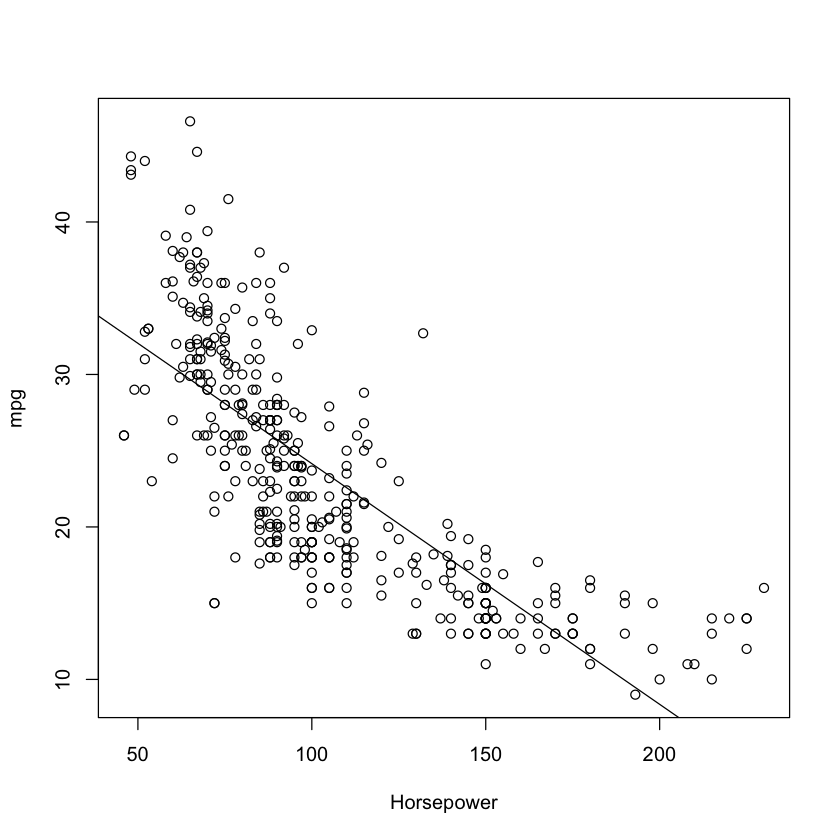

In [14]:
plot(Auto$horsepower, Auto$mpg, xlab = 'Horsepower', ylab = 'mpg')
abline(lm_auto)

## Question 8c

Use the `plot()` function to produce diagnostic plots of the least squares regression fit. Comment on any problems you see with the fit.

-----

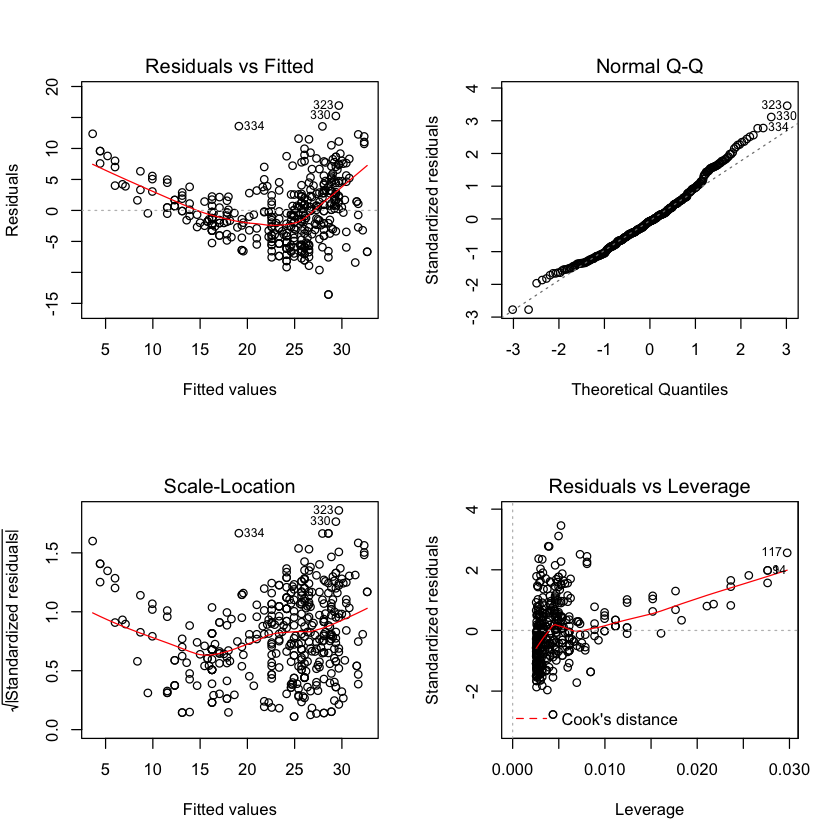

In [16]:
par(mfrow=c(2,2))
plot(lm_auto)

There is some evidence of non-linearity in the residual plot. I would then recommend trying polynomial fit

# Question 9

This question involves the use of multiple linear regression on the Auto data set.

## Question 9a

Produce a scatterplot matrix which includes all of the variables in the data set.

----

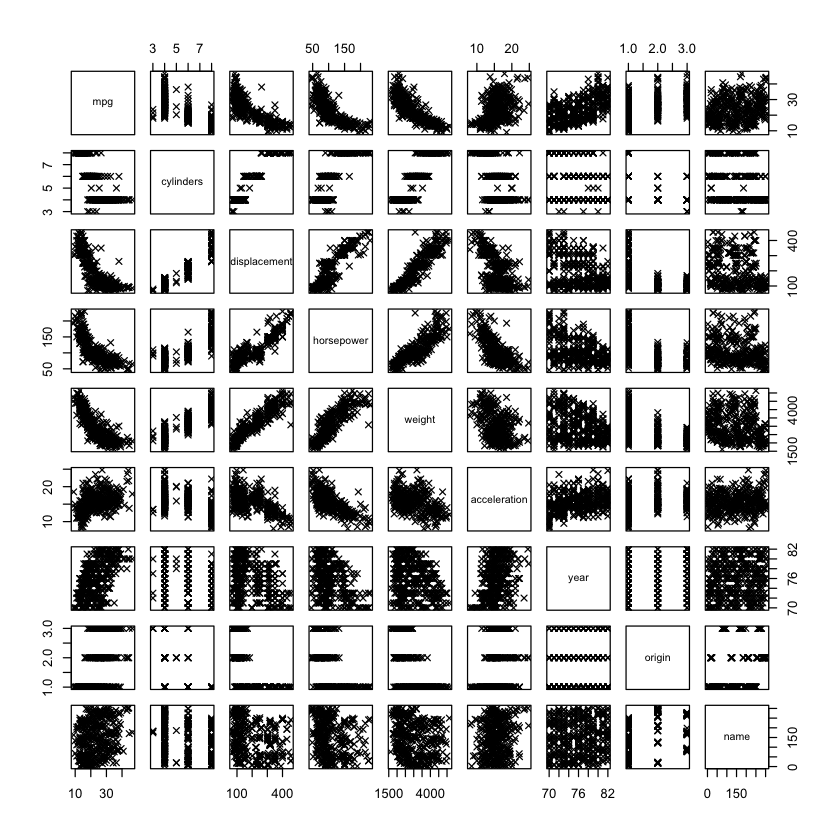

In [19]:
pairs(Auto, pch=4)

## Question 9b

Compute the matrix of correlations between the variables using the function `cor()`. You will need to exclude the `name` variable, which is qualitative.  

-----

In [24]:
cor(subset(Auto, select=-name))

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.0000000,-0.7776175,-0.8051269,-0.7784268,-0.8322442,0.4233285,0.5805410,0.5652088
cylinders,-0.7776175,1.0000000,0.9508233,0.8429834,0.8975273,-0.5046834,-0.3456474,-0.5689316
displacement,-0.8051269,0.9508233,1.0000000,0.8972570,0.9329944,-0.5438005,-0.3698552,-0.6145351
horsepower,-0.7784268,0.8429834,0.8972570,1.0000000,0.8645377,-0.6891955,-0.4163615,-0.4551715
weight,-0.8322442,0.8975273,0.9329944,0.8645377,1.0000000,-0.4168392,-0.3091199,-0.5850054
acceleration,0.4233285,-0.5046834,-0.5438005,-0.6891955,-0.4168392,1.0000000,0.2903161,0.2127458
year,0.5805410,-0.3456474,-0.3698552,-0.4163615,-0.3091199,0.2903161,1.0000000,0.1815277
origin,0.5652088,-0.5689316,-0.6145351,-0.4551715,-0.5850054,0.2127458,0.1815277,1.0000000


## Question 9c

c) Use the `lm()` function to perform a multiple linear regression with `mpg` as the response and all other variables except `name` as the predictors. Use the `summary()` function to print the results. Comment on the output.  

-----

In [25]:
mlm_auto = lm(mpg~.-name, data=Auto)
summary(mlm_auto)


Call:
lm(formula = mpg ~ . - name, data = Auto)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5903 -2.1565 -0.1169  1.8690 13.0604 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -17.218435   4.644294  -3.707  0.00024 ***
cylinders     -0.493376   0.323282  -1.526  0.12780    
displacement   0.019896   0.007515   2.647  0.00844 ** 
horsepower    -0.016951   0.013787  -1.230  0.21963    
weight        -0.006474   0.000652  -9.929  < 2e-16 ***
acceleration   0.080576   0.098845   0.815  0.41548    
year           0.750773   0.050973  14.729  < 2e-16 ***
origin         1.426141   0.278136   5.127 4.67e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.328 on 384 degrees of freedom
Multiple R-squared:  0.8215,	Adjusted R-squared:  0.8182 
F-statistic: 252.4 on 7 and 384 DF,  p-value: < 2.2e-16


i) There is a relationship between the predictors and the response (mpg). The F statistic is well above 1 and the p-value is close to zero so we can reject the null hypothesis that there is no relationship between these two. It is a significant relationship (p-value <2e-16). The R<sup>2</sup> is 0.8215, suggesting that ~82.15% of the variability in mpg can be explained by horsepower.

ii) Displacement, Weight, year and origin have a statistically significant (p < 0.05) relationship to the response.

iii) The coefficient for the year variable suggests that for every unit change in year there is a 0.75 increase in mpg. Perhaps suggesting that newer cars have more mpg than older cars.

## Question 9d

Use the `plot()` function to produce diagnostic plots of the linear regression fit. Comment on any problems you see with the fit. Do the residual plots suggest any unusually large outliers? Does the leverage plot identify any observations with unusually high leverage?  

-----

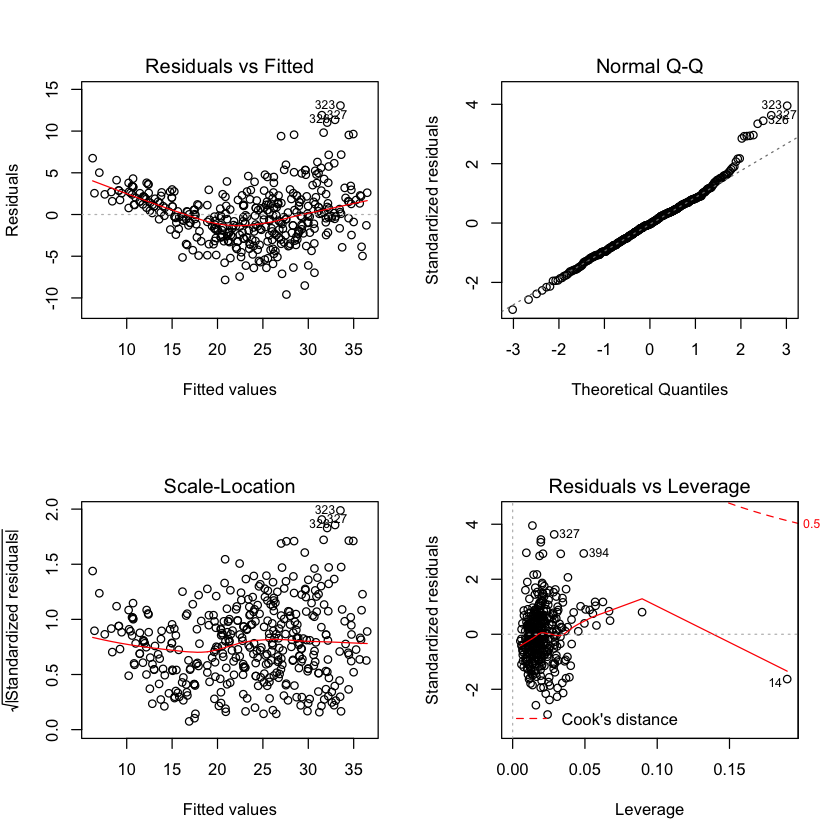

In [29]:
par(mfrow=c(2,2))
plot(mlm_auto)

There is a discernible curve in the residual plot, suggesting the linear fit isn't quite correct

Point 14 has particularly high leverage, even though its magnitude is not particularly high.

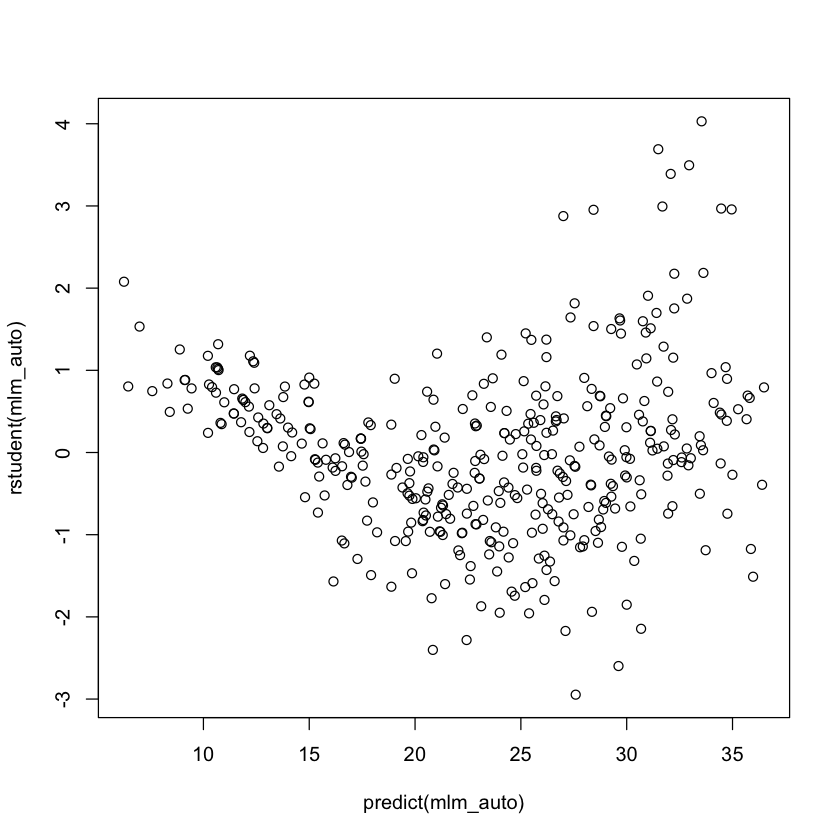

In [31]:
plot(predict(mlm_auto), rstudent(mlm_auto))

The studentised residuals plot suggest that there are some outliers as their studentised residual values are > 3.

## Question 9e

Use the * and : symbols to fit linear regression models with interaction effects. Do any interactions appear to be statistically significant?  

-----

In [33]:
# The correlation matrix suggest there is interaction between displacement and cylinders, and displacement and weight
mlm_auto_2 = lm(mpg~.-name+displacement*cylinders+displacement*weight, data=Auto)
summary(mlm_auto_2)


Call:
lm(formula = mpg ~ . - name + displacement * cylinders + displacement * 
    weight, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.0609  -1.7589  -0.0494   1.5790  12.1496 

Coefficients:
                         Estimate Std. Error t value Pr(>|t|)    
(Intercept)            -4.795e+00  4.515e+00  -1.062  0.28883    
cylinders              -1.091e-01  5.965e-01  -0.183  0.85502    
displacement           -7.186e-02  1.363e-02  -5.273 2.25e-07 ***
horsepower             -3.457e-02  1.304e-02  -2.651  0.00836 ** 
weight                 -1.030e-02  1.064e-03  -9.680  < 2e-16 ***
acceleration            6.618e-02  8.817e-02   0.751  0.45334    
year                    7.840e-01  4.566e-02  17.171  < 2e-16 ***
origin                  5.475e-01  2.643e-01   2.071  0.03901 *  
cylinders:displacement  1.186e-03  2.715e-03   0.437  0.66251    
displacement:weight     2.141e-05  3.712e-06   5.768 1.66e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.

Indeed the interaction term displacement, weight does seem to be stastically significant.

## Question 9f

Try a few different transformations of the variables such as $log(X)$, $ \sqrt{X} $, $ X^2 $. Comment on your findings

-----


Call:
lm(formula = mpg ~ log(weight) + sqrt(horsepower) + acceleration + 
    I(acceleration^2), data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.2932  -2.5082  -0.2237   2.0237  15.7650 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)       178.30303   10.80451  16.503  < 2e-16 ***
log(weight)       -14.74259    1.73994  -8.473 5.06e-16 ***
sqrt(horsepower)   -1.85192    0.36005  -5.144 4.29e-07 ***
acceleration       -2.19890    0.63903  -3.441 0.000643 ***
I(acceleration^2)   0.06139    0.01857   3.305 0.001037 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.99 on 387 degrees of freedom
Multiple R-squared:  0.7414,	Adjusted R-squared:  0.7387 
F-statistic: 277.3 on 4 and 387 DF,  p-value: < 2.2e-16


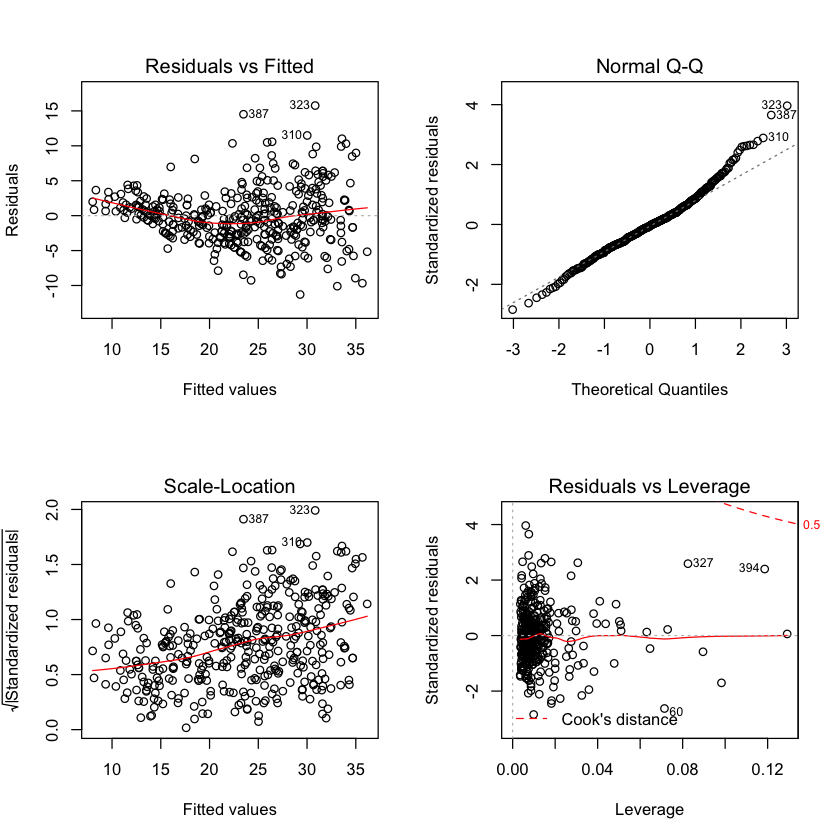

In [36]:
mlm_auto3 = lm(mpg~log(weight)+sqrt(horsepower)+acceleration+I(acceleration^2), data=Auto)
summary(mlm_auto3)
par(mfrow=c(2,2))
plot(mlm_auto3)

Apparently, from the p-values, the $log(weight)$, $\sqrt{horsepower}$, and $acceleration^2$ all have statistical significance of some sort. The residuals plot has less of a discernible pattern than the plot of all linear regression terms. The leverage plot indicates more than three points with high leverage.

However, 2 problems are observed from the above plots:

the residuals vs fitted plot indicates heteroskedasticity (unconstant variance over mean) in the model.
The Q-Q plot indicates somewhat unnormality of the residuals.

So, a better transformation need to be applied to our model. From the correlation matrix in 9a., displacement, horsepower and weight show a similar nonlinear pattern against our response mpg. This nonlinear pattern is very close to a log form. So in the next attempt, we use `log(mpg)` as our response variable.

In [39]:
mlm_auto4<-lm(log(mpg)~cylinders+displacement+horsepower+weight+year+origin,data=Auto)
summary(mlm_auto4)


Call:
lm(formula = log(mpg) ~ cylinders + displacement + horsepower + 
    weight + year + origin, data = Auto)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.40671 -0.06629  0.00104  0.06899  0.33853 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   1.723e+00  1.493e-01  11.539  < 2e-16 ***
cylinders    -2.772e-02  1.154e-02  -2.402  0.01679 *  
displacement  6.466e-04  2.673e-04   2.419  0.01601 *  
horsepower   -1.359e-03  3.876e-04  -3.505  0.00051 ***
weight       -2.594e-04  2.044e-05 -12.693  < 2e-16 ***
year          2.963e-02  1.817e-03  16.309  < 2e-16 ***
origin        4.067e-02  9.944e-03   4.090 5.25e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.119 on 385 degrees of freedom
Multiple R-squared:  0.8795,	Adjusted R-squared:  0.8776 
F-statistic: 468.2 on 6 and 385 DF,  p-value: < 2.2e-16


## Question 10

This question should be answered using the `Carseats` data set.

## Question 10a

a) Fit a multiple regression model to predict `Sales` using `Price`, `Urban` and `US`.  

-----

In [41]:
fix(Carseats)

In [42]:
head(Carseats)

Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
11.22,111,48,16,260,83,Good,65,10,Yes,Yes
10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4.15,141,64,3,340,128,Bad,38,13,Yes,No
10.81,124,113,13,501,72,Bad,78,16,No,Yes


In [44]:
mlm_carseats <- lm(Sales~Price+Urban+US, data=Carseats)

In [45]:
summary(mlm_carseats)


Call:
lm(formula = Sales ~ Price + Urban + US, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.9206 -1.6220 -0.0564  1.5786  7.0581 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.043469   0.651012  20.036  < 2e-16 ***
Price       -0.054459   0.005242 -10.389  < 2e-16 ***
UrbanYes    -0.021916   0.271650  -0.081    0.936    
USYes        1.200573   0.259042   4.635 4.86e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.472 on 396 degrees of freedom
Multiple R-squared:  0.2393,	Adjusted R-squared:  0.2335 
F-statistic: 41.52 on 3 and 396 DF,  p-value: < 2.2e-16


## Question 10b

Provide an interpretation of each coefficient in the model. Some are qualitative.  

-----

For a single unit increase in price, 54 fewer carseats are sold.

0.0219 fewer carseats are sold in Urban areas. However, this is not statistically significant due to the high p-value of the t-statistic, so this should be excluded from our model.

1200 more carseats are sold if the store is in the US.

## Question 10c

Write out the model in the equation form.

-----

$ Sales = 13.043 - 0.0544(Price) - 0.02(UrbanYes) + 1.201(USYes) $

## Question 10d

For which of the predictors can you reject the null hypothesis $ H_0 = \beta_j = 0 $

-----

For whether the shop is in an urban area or not we cannot reject the null hypothesis (p > 0.05) but for `Price` and `US` we can reject the null hypothesis (p < 0.05).

## Question 10e

On the bases of the response to (d), fit a smaller model that only uses the predictors for which there is evidence of association with the outcome.

-----


In [46]:
mlm_carseats_2 = lm(Sales~Price + Urban, data=Carseats)
summary(mlm_carseats_2)


Call:
lm(formula = Sales ~ Price + Urban, data = Carseats)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.5324 -1.8441 -0.1443  1.6662  7.5000 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 13.621458   0.655230  20.789   <2e-16 ***
Price       -0.053104   0.005367  -9.895   <2e-16 ***
UrbanYes     0.034095   0.278293   0.123    0.903    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.535 on 397 degrees of freedom
Multiple R-squared:  0.198,	Adjusted R-squared:  0.194 
F-statistic: 49.01 on 2 and 397 DF,  p-value: < 2.2e-16


## Question 10f

How well do the models in (a) and (e) fit the data?

----

The models in a and e fit the data similarly well from their RSE value (2.472 and 2.535 respectively) and R<sup>2</sup> value (0.2393 and 0.198 respectively). The models can explain ~20% of the variability in car seat sales


## Question 10g

Using the model from (e), obtain 95% confidence interfals for the coefficients.

-----

In [47]:
confint(mlm_carseats_2)

,2.5 %,97.5 %
(Intercept),12.33330469,14.90961133
Price,-0.06365522,-0.04255265
UrbanYes,-0.51301769,0.58120758


## Question 10h

Is there evidence of outliers or high leverage observations in the model from (e)?

-----

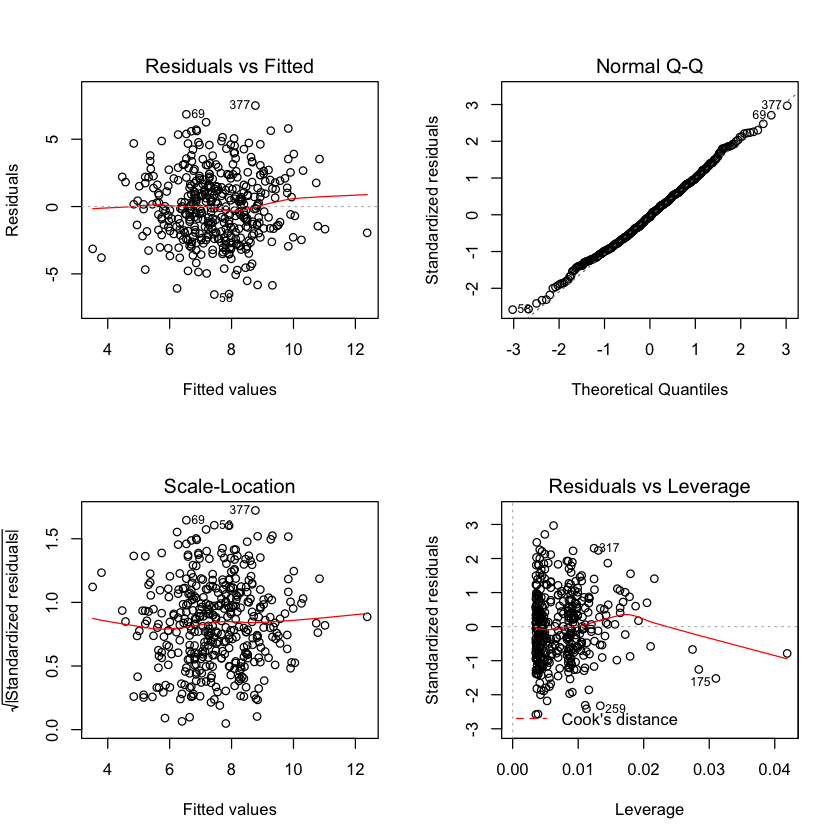

In [50]:
par(mfrow=c(2,2))
plot(mlm_carseats_2)

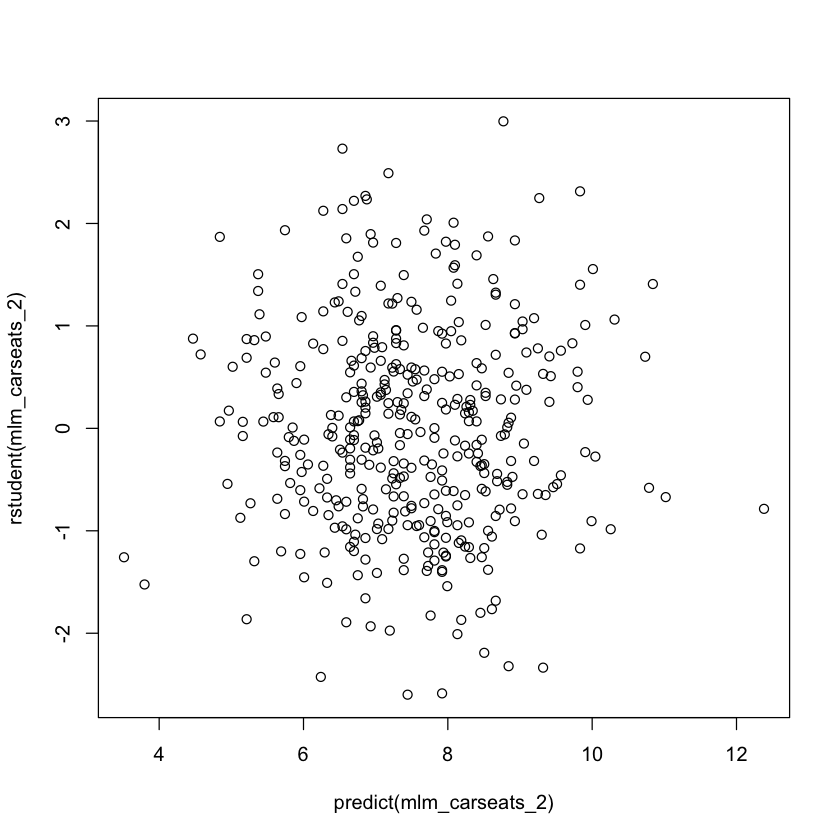

In [51]:
plot(predict(mlm_carseats_2), rstudent(mlm_carseats_2))

There are not many outliers, but there are some leverage points that are highly leveraged according to our leverage plot.

# Question 11

In this problem we will investigate the t-statistic for the null hypothesis 

$H_0: \beta = 0 $

in simple linear regression without an intercept. 

To begin, we generate a predictor x and a response y as follows.

In [53]:
set.seed(1)
x = rnorm(100)
y = 2 * x + rnorm(100)

## Question 11a
Perform a simple linear regression of y onto x, without an intercept. 

Report the coefficient estimate $\hat{\beta}$, the standard error of this coefficient estimate, and the t-statistic and p-value associated with the null hypothesis 

$H_0: \beta = 0 $. 

Comment on these results. (You can perform regression without an intercept using the command `lm(y∼x+0)`.)

In [55]:
lm.fit = lm(y~x+0)

In [56]:
summary(lm.fit)


Call:
lm(formula = y ~ x + 0)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.9154 -0.6472 -0.1771  0.5056  2.3109 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
x   1.9939     0.1065   18.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9586 on 99 degrees of freedom
Multiple R-squared:  0.7798,	Adjusted R-squared:  0.7776 
F-statistic: 350.7 on 1 and 99 DF,  p-value: < 2.2e-16


The coefficient estimate is 1.9939, so for each unit increase in x, y increases by 1.9939.

The t-value is high and p-value of the t-statistic is close to zero, strongly indicating that there is a statistically significant relationship between x and y.

## Question 11b

Now perform a simple linear regression of x onto y without an intercept, and report the coefficient estimate, its standard error, and the corresponding t-statistic and p-values associated with the null hypothesis. Comment on these results.

In [57]:
lm.fit2 = lm(y~x)
summary(lm.fit2)


Call:
lm(formula = y ~ x)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8768 -0.6138 -0.1395  0.5394  2.3462 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.03769    0.09699  -0.389    0.698    
x            1.99894    0.10773  18.556   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9628 on 98 degrees of freedom
Multiple R-squared:  0.7784,	Adjusted R-squared:  0.7762 
F-statistic: 344.3 on 1 and 98 DF,  p-value: < 2.2e-16


The p-value is again close to zero, so we reject the null hypothesis. The intercept coefficient is very close to zero and x remains close to 2.

## Question 11c

What is the relationship between the results obtained in (a) and (b)?

----

Both results indicate a relationship that is very close to y = 2x, which is not surprising, given how the data was constructed.

## Question 11d

For the regression of Y onto X without an intercept, the t-statistic for $ H_0: \beta = 0 $ takes the form:

$ t = \dfrac{\hat{\beta}}{\text{SE}(\hat{\beta})} $

and $\hat{\beta}$ takes the form:

$ \hat{\beta} = \dfrac{\Sigma^n_{i=1} x_i y_i}{\Sigma^n_{i=1} x^2_i}$

and where:

$ \text{SE}(\hat{\beta}) = \sqrt{\dfrac{\Sigma^n_{i=1}(y_i - x_i \hat{\beta})^2}{(n-1)\Sigma^n_{i=1}x^2_{i}}} $

Show that t can be written as:

$ t = \dfrac{\sqrt{(n-1)}\Sigma^n_{i=1}x_i y_i}{\sqrt{(\Sigma^n_{i=1}x_i^2)(\Sigma^n_{i=1}y_i^2)-(\Sigma^n_{i=1}x_i y_i)^2}} $

------

Substituting in $\text{SE}(\hat{\beta})$ and $ \hat{\beta} $ into $ t $ gives us:

$ t = \dfrac{\Sigma^n_{i=1} x_i y_i}{\Sigma^n_{i=1} x^2_i} \sqrt{\dfrac{(n-1)\Sigma^n_{i=1}x^2_{i}}{\Sigma^n_{i=1}(y_i - x_i \hat{\beta})^2}} $

Which can be rearranged to give:

$ t = \dfrac{\Sigma^n_{i=1} x_i y_i \sqrt{(n-1)}}{\sqrt{\Sigma^n_{i=1}x_i^2 \Sigma^n_{i=1}(y_i - x_i \beta)^2}} $

If we multiply out the brackets in the denominator:

$ t = \dfrac{\Sigma^n_{i=1} x_i y_i \sqrt{(n-1)}}{\sqrt{\Sigma^n_{i=1}x_i^2 \Sigma^n_{i=1}(y_i^2 - x_i y_i\beta + x^2_i \beta^2)}} $

Then if we factorise out the bottom we can get:

$ t = \dfrac{\Sigma^n_{i=1} x_i y_i \sqrt{(n-1)}}{\sqrt{\Sigma^n_{i=1}x_i^2 \Sigma^n_{i=1}y_i^2 - \Sigma^n_{i=1}x^2\beta (\Sigma^n_{i=1} 2 x_i y_i - \beta \Sigma^n_{i=1}x^2)}} $

If we expand $\beta$ using the equation above we get:

$ t = \dfrac{\Sigma^n_{i=1} x_i y_i \sqrt{(n-1)}}{\sqrt{\Sigma^n_{i=1}x_i^2 \Sigma^n_{i=1}y_i^2 - \Sigma^n_{i=1}x_iy_i (\Sigma^n_{i=1} 2 x_i y_i - \Sigma^n_{i=1}x_iy_i)}} $

Which simplifies to:

$ t = \dfrac{\sqrt{(n-1)} \Sigma^n_{i=1} x_i y_i }{\sqrt{\Sigma^n_{i=1}x_i^2 \Sigma^n_{i=1}y_i^2 - \Sigma^n_{i=1}(x_iy_i)^2}} $

And shown in r:

In [75]:
# From the linear model
coef(summary(lm.fit))["x", "t value"]

[1] 18.72593

In [74]:
# Using the equation above
(sqrt(length(x)-1) * sum(x*y)) / (sqrt(sum(x^2) * sum(y^2) - (sum(x*y))^2))

[1] 18.72593

## Question 11e

Using the results from (d), argue that the t-statistic for the re- gression of y onto x is the same as the t-statistic for the regression of x onto y.

----

This can be seen from the equation above, swapping x and y in the equation will result in the same answers

## Question 11f

In R, show that when regression is performed with an intercept, the t-statistic for the null hypothesis is the same for the regression of y onto x as it is for the regression of x onto y.

-----

In [77]:
y_onto_x = lm(x~y)
x_onto_y = lm(y~x)
coef(summary(y_onto_x))["y", "t value"]
coef(summary(x_onto_y))["x", "t value"]

[1] 18.5556

[1] 18.5556

# Question 12

This problem involves simple linear regression without an intercept

## Question 12a

Recall that the coefficient estimate $\hat{\beta}$ for the linear regression of Y onto X without an intercept is given by:

$\hat{y_i} = x_i\hat{\beta}$

$ \hat{\beta} = \dfrac{\Sigma_{i=1}^n x_i y_i}{\Sigma_{i=1}^n x_i^2} $

Under what circumstance is the coefficient estimate for the regression of X onto Y the same as the coefficient estimate for the regression of Y onto X?

-----

When the sum of squares of X observations = sum of squares of Y observations

## Question 12b

Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is _different_ from the coefficient estimate for the regression of Y onto X.

-----

In [19]:
set.seed(1)
x <- rnorm(100)
y <- x + rnorm(100, 3, 1)
lm.fit <- lm(y~x+0)
lm.fit2 <- lm(x~y+0)
coef(summary(lm.fit))['x', 'Estimate']
coef(summary(lm.fit2))['y', 'Estimate']

[1] 1.396889

[1] 0.1016666

## Question 12c

Generate an example in R with n = 100 observations in which the coefficient estimate for the regression of X onto Y is _the same_ as the coefficient estimate for the regression of Y onto X.

-----

In [23]:
x <- rnorm(100)
# Shuffle x
y <- sample(x)
lm.fit <- lm(y~x+0)
lm.fit2 <- lm(x~y+0)
coef(summary(lm.fit))['x', 'Estimate']
coef(summary(lm.fit2))['y', 'Estimate']

[1] 0.06949141

[1] 0.06949141

# Question 13

In this excercise you will create some simulated data and will fit simple linear regression models to it. Make sure to `use set.seed(1)` prior to starting part (a) to ensure consistent results.

## Question 13 a

Using the `rnorm()` function, create a vector `x`, containing 100 observations drawn from a N(0,1) distribution. This represents a feature, X.

-----

In [27]:
set.seed(1)
x <- rnorm(100, 0, 1)

## Question 13b

Using the `rnorm()` function, create a vector `eps`, containing 100 observations drawn from a N(0, 0.25) distribution i.e. a normal distribution with mean zero and variance 0.25.

-----

In [29]:
# stdev = sqrt(variance)
eps <- rnorm(100, 0, sqrt(0.25))

## Question 13c

Using `x` and `eps` generate a vector according to the model

$ Y = -1 + 0.5X + \epsilon $

What is the length of vector y? What are the values of $\beta_0$ and $\beta_1$ in this linear model

-----

In [30]:
y = 0.5 * x - 1 + eps
length(y)

[1] 100

$ \beta_0 = -1 $   
$ \beta_1 = 0.5 $

## Question 13d

Create a scatterplot displaying the relationship between `x` and `y`. Comment on what you observe

-----

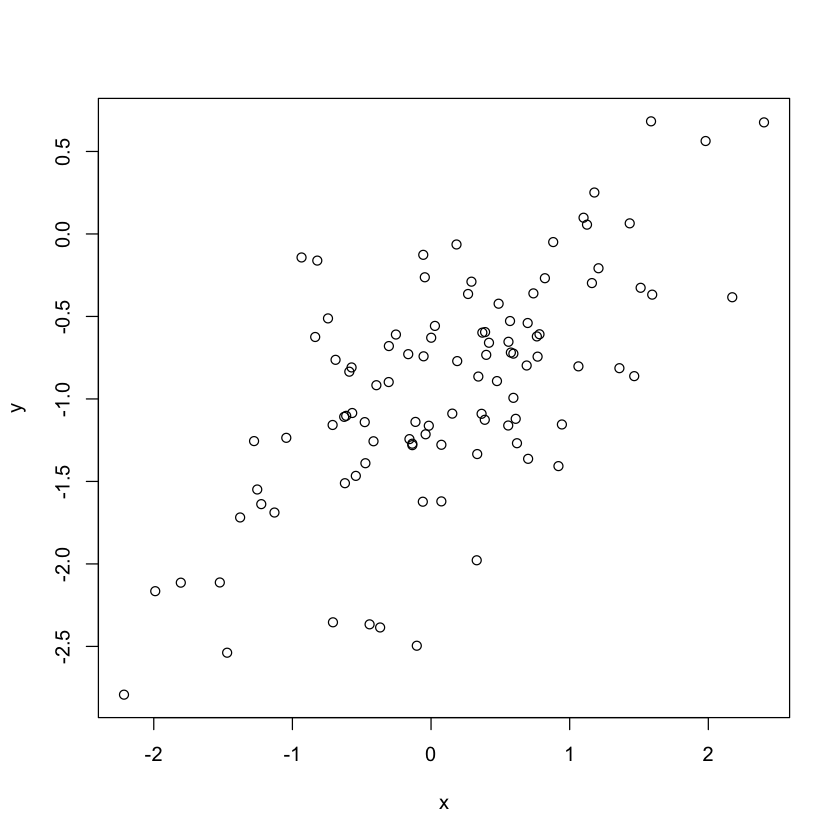

In [31]:
plot(x, y)

Observe a linear relationship between X and Y with a mean of x around 0 and mean of y around -1 (as expected by $\beta_0$)

## Question 13e

Fit a least squares linear model to predict `y` using `x`. Comment on the model obtained. How to $\hat{\beta_0}$ and $\hat{\beta_1}$ compare to $\beta_0$ and $\beta_1$

-----

In [33]:
lm.fit = lm(y~x)
summary(lm.fit)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.45706 -0.24115 -0.02266  0.32462  1.32079 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.98632    0.05235 -18.840  < 2e-16 ***
x            0.51058    0.05815   8.781 5.34e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5197 on 98 degrees of freedom
Multiple R-squared:  0.4403,	Adjusted R-squared:  0.4346 
F-statistic:  77.1 on 1 and 98 DF,  p-value: 5.336e-14


$\hat{\beta_0} = -0.98632 $  
$\hat{\beta_1} = 0.51058 $  
Both similar to, but slightly higher than true values

## Question 13f

Display the least squares line on the scatterplot obtained in (d). Draw the population regression line on the plot, in a different color. Use the `legend()` command to create an appropriate legend

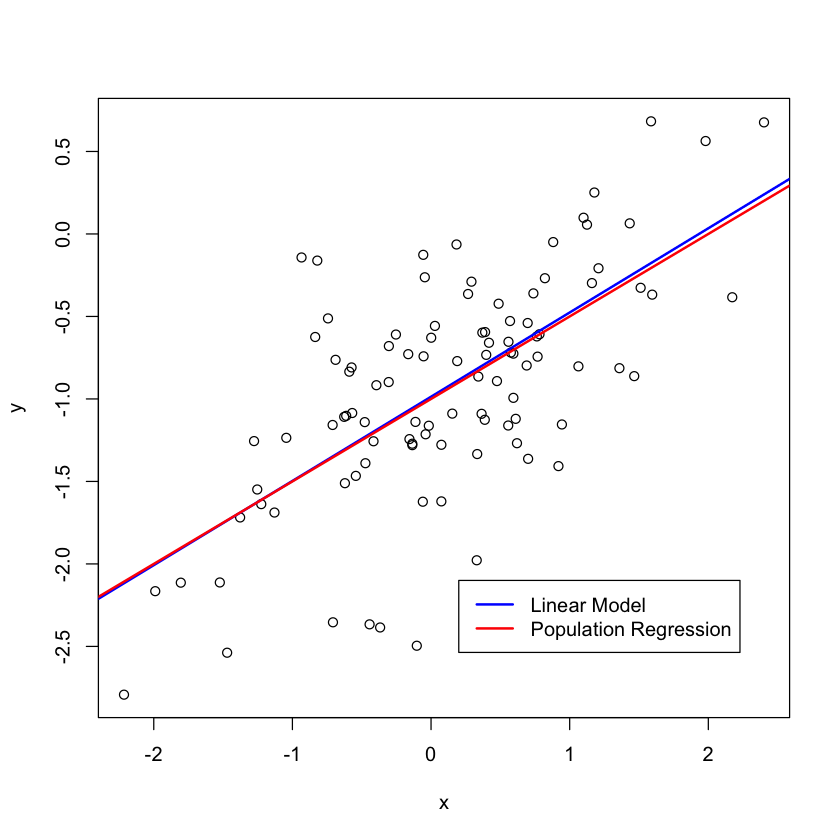

In [48]:
plot(x, y)
abline(lm.fit, lwd=2, col="blue")
abline(-1, 0.5, lwd=2, col="red")
legend(0.2, -2.1, legend = c("Linear Model", "Population Regression"), col=c("blue", "red"), lwd=2)

## Question 13g

Now fit a polynomial regression model that predicts $Y$ using $X$ and $X^2$. Is there any evidence that the quadratic term improves the model fit?

-----

In [50]:
qlm.fit = lm(y~x+I(x^2))
summary(qlm.fit)


Call:
lm(formula = y ~ x + I(x^2))

Residuals:
     Min       1Q   Median       3Q      Max 
-1.46371 -0.24761 -0.01792  0.32978  1.32271 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.979434   0.064138 -15.271  < 2e-16 ***
x            0.511912   0.058865   8.696 8.71e-14 ***
I(x^2)      -0.008668   0.046208  -0.188    0.852    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5223 on 97 degrees of freedom
Multiple R-squared:  0.4405,	Adjusted R-squared:  0.429 
F-statistic: 38.19 on 2 and 97 DF,  p-value: 5.856e-13


Although there R<sup>2</sup> statistic suggests that the model fit has improved, the p value suggests there is no significant relationship between $Y$ and $X^2$

## Question 13h

Repeat a-f after modifying the data generation processs in such a way that there is less noise in the data.

-----


Call:
lm(formula = y_less_noise ~ x)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.293451 -0.080887 -0.007559  0.076665  0.276983 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.02109    0.01090  -93.65   <2e-16 ***
x            0.51038    0.01211   42.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1082 on 98 degrees of freedom
Multiple R-squared:  0.9477,	Adjusted R-squared:  0.9472 
F-statistic:  1776 on 1 and 98 DF,  p-value: < 2.2e-16


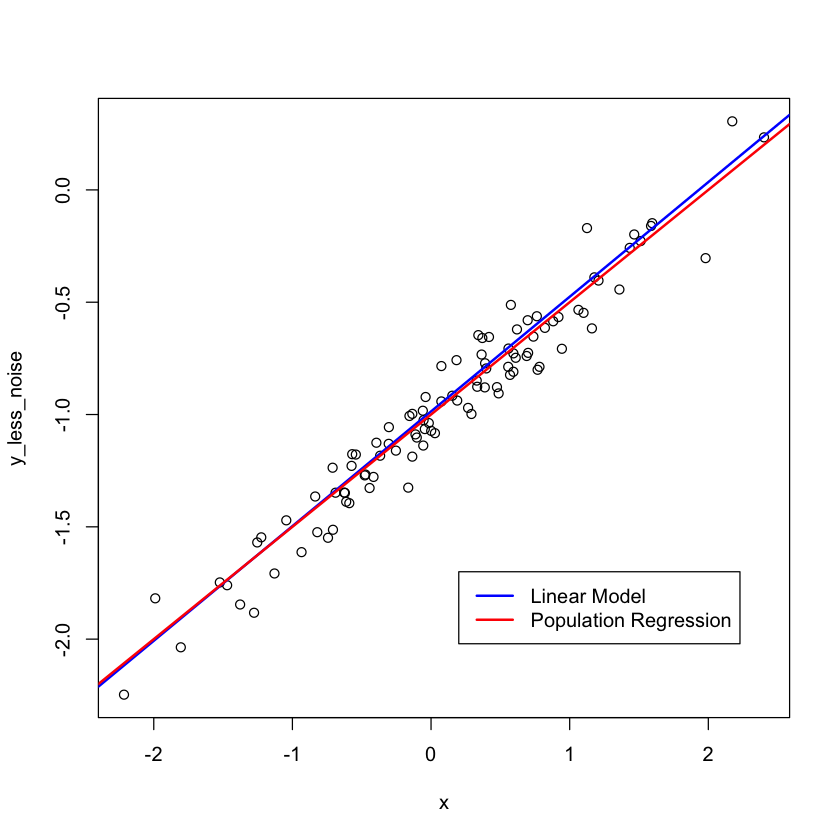

In [54]:
eps_less_noise <- rnorm(100, 0, sqrt(0.01))

y_less_noise <- 0.5 * x - 1 + eps_less_noise

lm.fit_less_noise = lm(y_less_noise ~ x)
summary(lm.fit_less_noise)
plot(x, y_less_noise)
abline(lm.fit, lwd=2, col="blue")
abline(-1, 0.5, lwd=2, col="red")
legend(0.2, -1.7, legend = c("Linear Model", "Population Regression"), col=c("blue", "red"), lwd=2)

## Question 13h

Repeat a-f after modifying the data generation processs in such a way that there is more noise in the data.

-----


Call:
lm(formula = y_more_noise ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.86047 -0.66645  0.09907  0.65121  2.24782 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -1.0072     0.1064  -9.467 1.74e-15 ***
x             0.6032     0.1182   5.104 1.63e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 98 degrees of freedom
Multiple R-squared:   0.21,	Adjusted R-squared:  0.2019 
F-statistic: 26.05 on 1 and 98 DF,  p-value: 1.631e-06


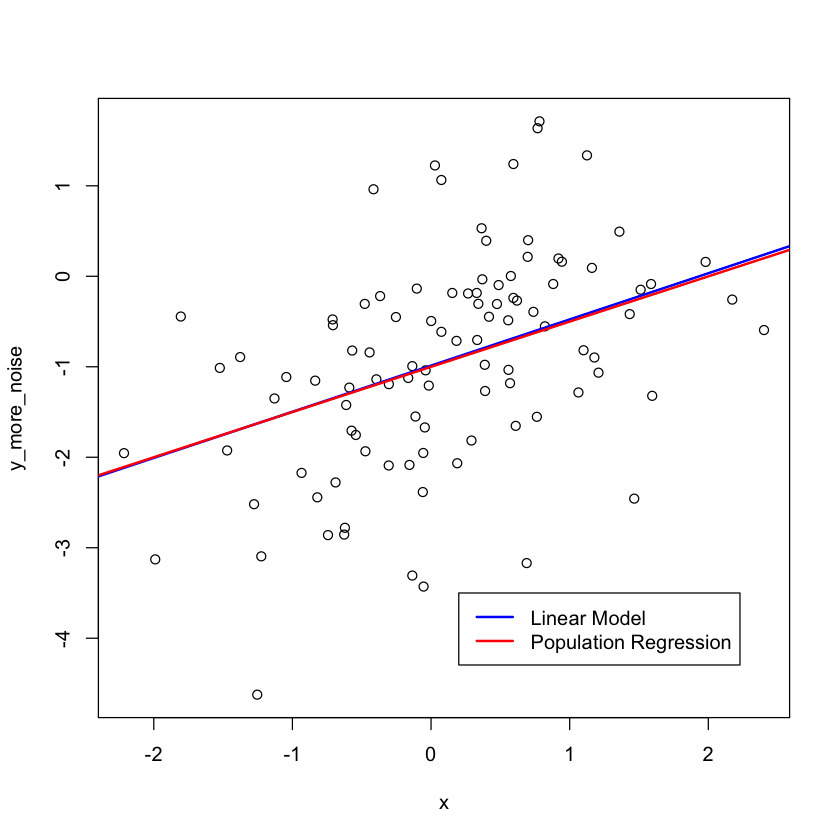

In [57]:
eps_more_noise <- rnorm(100, 0, 1)

y_more_noise <- 0.5 * x - 1 + eps_more_noise

lm.fit_more_noise = lm(y_more_noise ~ x)
summary(lm.fit_more_noise)
plot(x, y_more_noise)
abline(lm.fit, lwd=2, col="blue")
abline(-1, 0.5, lwd=2, col="red")
legend(0.2, -3.5, legend = c("Linear Model", "Population Regression"), col=c("blue", "red"), lwd=2)

## Question 13j

What are the confidence intervals for $\beta_0$ and $\beta_1$ based on the original data set, the noiser data set and the less noisy data set? Comment on your results

-----

In [58]:
confint(lm.fit)

,2.5 %,97.5 %
(Intercept),-1.0902064,-0.8824249
x,0.3951885,0.6259784


In [59]:
confint(lm.fit_less_noise)

,2.5 %,97.5 %
(Intercept),-1.0427249,-0.9994521
x,0.4863504,0.5344150


In [60]:
confint(lm.fit_more_noise)

,2.5 %,97.5 %
(Intercept),-1.2182922,-0.7960414
x,0.3686467,0.8376547


As the size of the noise (irreducible error) is reduced, the confidence intervals become tighter

# Question 14

This problem focuses on the collinearity problem

## Question 14a

What is the form of the following linear model, what are the regression coefficients?

In [64]:
set.seed(1)
x1 = runif(100)
x2 = 0.5 * x1 + rnorm(100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + rnorm(100)

The form of this linear model is:

$ y = 2 + 2X_1 + 0.3X_2 + \epsilon $

The regression coefficients are:

$ \beta_0 = 2 $

$ \beta_1 = 2 $

$ \beta_2 = 0.3 $

## Question 14b

What is the correlation between `x1` and `x2`? Create a scatterplot displaying the relationship between the variables.

-----

[1] 0.8351212

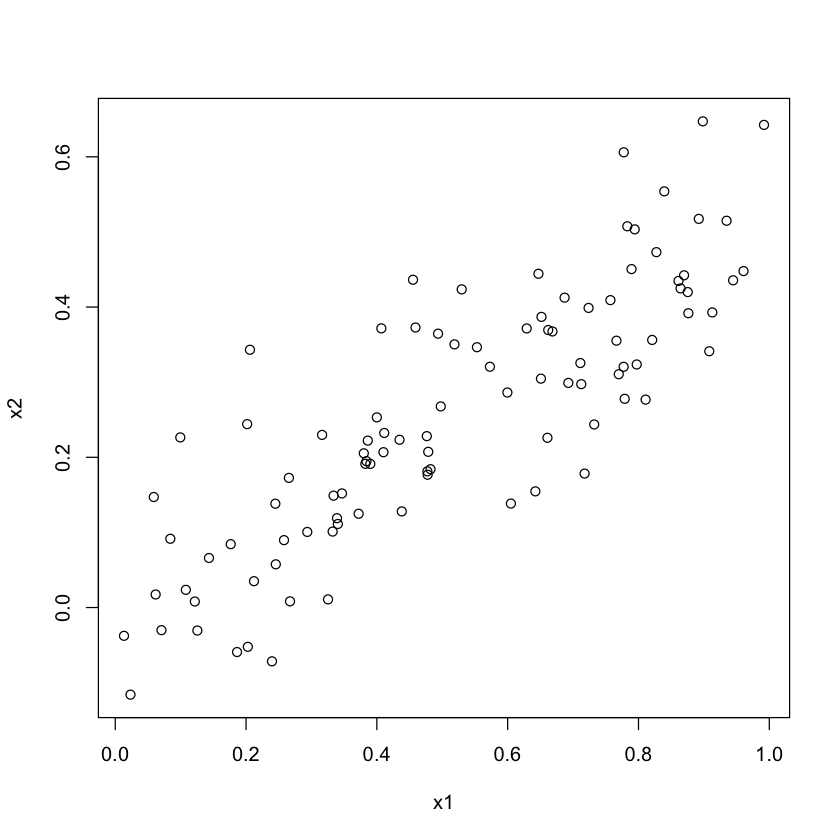

In [65]:
cor(x1, x2)
plot(x1, x2)

## Question 14c

Using this data, fit a least squares regression to predict `y` using `x1` and `x2`. Describe the results obtained. 

What are $\hat{\beta_0}, \hat{\beta_1} \text{and} \hat{\beta_2}$? 

How do these relate to the true $\beta_0, \beta_1 \text{and} \beta_2$? 

Can you reject the null hypothesis $ H_0 : \beta_1 = 0 $?

How about the null hypothesis $ H_0 : \beta_2 = 0 $?

-----

In [67]:
lm.fit = lm(y~x1+x2)
summary(lm.fit)


Call:
lm(formula = y ~ x1 + x2)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.8311 -0.7273 -0.0537  0.6338  2.3359 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1305     0.2319   9.188 7.61e-15 ***
x1            1.4396     0.7212   1.996   0.0487 *  
x2            1.0097     1.1337   0.891   0.3754    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.056 on 97 degrees of freedom
Multiple R-squared:  0.2088,	Adjusted R-squared:  0.1925 
F-statistic:  12.8 on 2 and 97 DF,  p-value: 1.164e-05


We can reject the null hypothesis for $X_1$ if we set a significance limit of 5% as the p-value is slightly less than 5% but we cannot reject the null hypothesis for $X_2$

## Question 14d

Now fit a least squares regression to predict `y` using only `x1`. Comment on your results.

-----

In [68]:
lm.fit_x1_only = lm(y~x1)
summary(lm.fit_x1_only)


Call:
lm(formula = y ~ x1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.89495 -0.66874 -0.07785  0.59221  2.45560 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.1124     0.2307   9.155 8.27e-15 ***
x1            1.9759     0.3963   4.986 2.66e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.055 on 98 degrees of freedom
Multiple R-squared:  0.2024,	Adjusted R-squared:  0.1942 
F-statistic: 24.86 on 1 and 98 DF,  p-value: 2.661e-06


Predicting `y` using only `x1`, we can reject the null hypothesis that $ H_0 : \beta_1 = 0 $

## Question 14e

Now fit a least squares regression to predict `y` using only `x2`. Comment on your results.

-----

In [69]:
lm.fit_x2_only = lm(y~x2)
summary(lm.fit_x2_only)


Call:
lm(formula = y ~ x2)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62687 -0.75156 -0.03598  0.72383  2.44890 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.3899     0.1949   12.26  < 2e-16 ***
x2            2.8996     0.6330    4.58 1.37e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.072 on 98 degrees of freedom
Multiple R-squared:  0.1763,	Adjusted R-squared:  0.1679 
F-statistic: 20.98 on 1 and 98 DF,  p-value: 1.366e-05


Predicting y using only x2, we can reject the null hypothesis that $ H_0 : \beta_2 = 0 $?

## Question 14f

Do the results obtained in (c)-(e) contradict each other? Explain your answer.

-----

These results don't contradict one another. 

When regressed together, it is hard to tell which of the two predictors is responsible for explaining the variability in the response Y. The linear relationship between both X1 and Y and X2 and Y are demonstrated more clearly when regressed separately.

However, when regressed separately, due to the collinearity you don't get the whole story (e.g. Increased Ice Cream Sales -> Increased Shark attacks)

## Question 14g

Refit the linear models from (c) - (e) using the new data below.

What effect does this new observation have on each of the models?

In each model, is this observation an outlier? A high-leverage point? Both? Explain your answers.

-----

In [70]:
x1 = c(x1, 0.1)
x2 = c(x2, 0.8)
y = c(y, 6)

In [71]:
lm.fit1_new = lm(y~x1+x2)
lm.fit2_new = lm(y~x1)
lm.fit3_new = lm(y~x2)

In [72]:
coef(summary(lm.fit1_new))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.2266917,0.2313578,9.6244495,7.909712e-16
x1,0.5394397,0.5921970,0.9109125,3.645766e-01
x2,2.5145694,0.8976915,2.8011508,6.135787e-03


$X_1$ shifts to statistical insignificance, while $X_2$ shifts to statistical significance

In [73]:
coef(summary(lm.fit2_new))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.256927,0.2389635,9.444654,1.780749e-15
x1,1.765695,0.4123781,4.281739,4.294817e-05


Still significant on simple linear regression on $X_1$

In [74]:
coef(summary(lm.fit3_new))

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.345107,0.1912183,12.264029,1.403060e-21
x2,3.119050,0.6040352,5.163689,1.253125e-06


Still significant on simple linear regression on $X_2$

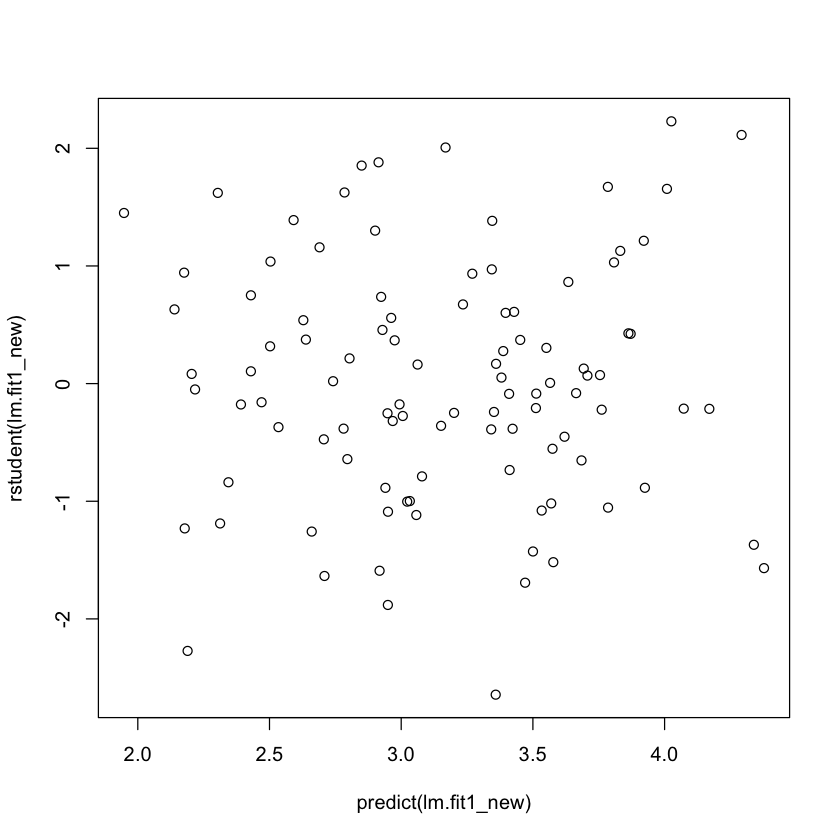

In [76]:
plot()

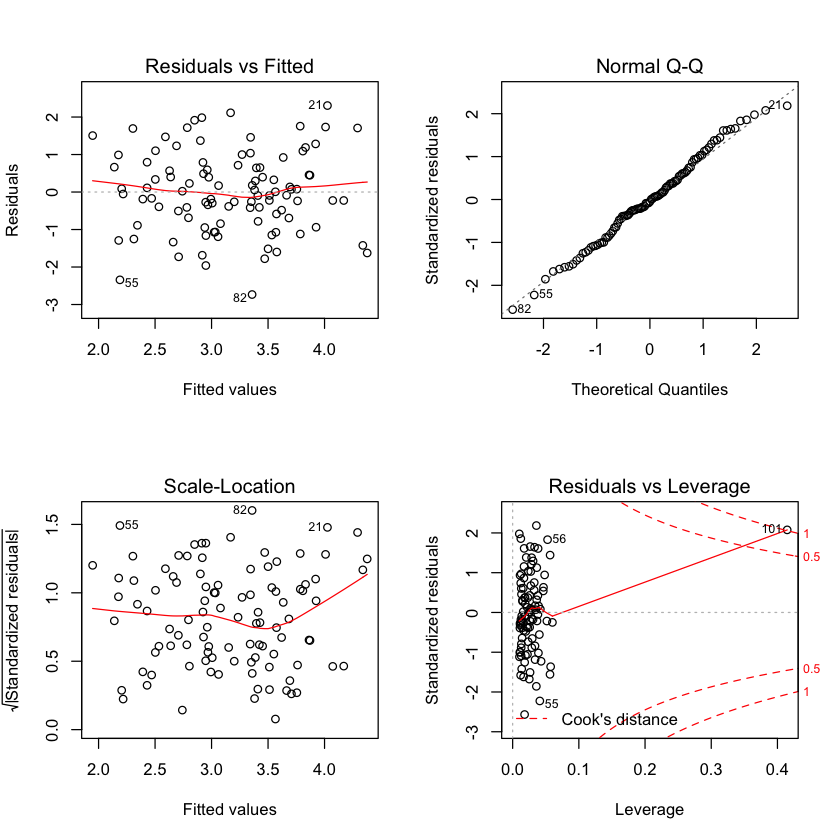

In [79]:
par(mfrow=c(2,2))
plot(lm.fit1_new)